In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from scipy.interpolate import interp1d

# Часть 1. Предобработка данных по добыче

Импорт данных

In [36]:
prod = pd.read_csv('C:\\Users\\mozgovoy.as\\working_files\\ProdData.csv', sep = ';', encoding = 'windows-1251')

In [38]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17778 entries, 0 to 17777
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Месторождение            17778 non-null  object 
 1   Скважина                 17778 non-null  object 
 2   Куст                     17144 non-null  object 
 3   Дата                     17778 non-null  object 
 4   Пласт                    17778 non-null  object 
 5   Эксплуатация             17778 non-null  object 
 6   Число дней эксплуатации  17778 non-null  float64
 7   Состояние                17778 non-null  object 
 8   Добыча нефти             17778 non-null  float64
 9   Добыча воды              17689 non-null  float64
 10  Обводненность            17689 non-null  float64
 11  Дебит нефти              17778 non-null  float64
 12  Дебит жидкости           17778 non-null  float64
 13  Добыча жидкости          17778 non-null  float64
 14  Добыча жидкости.1     

Обработка даты

In [39]:
prod['Дата'] = pd.to_datetime(prod['Дата'], format = '%d.%m.%Y')

In [40]:
prod['Месяц'] = prod['Дата'].dt.month_name()
prod['Год'] = prod['Дата'].dt.year

Расчет суммарного числа дней в эксплуатации

In [41]:
prod['Суммарное число дней в эксплуатации'] = prod.groupby(['Скважина', 'Пласт'])['Число дней эксплуатации'].cumsum()

Экстраполяция объемов добычи

In [42]:
def get_production_at_days(group, days, columns):
    group = group.drop_duplicates(subset=['Суммарное число дней в эксплуатации'])
    if len(group) < 2:
        return {col: None for col in columns}
    group = group.sort_values(by='Суммарное число дней в эксплуатации')
    result = {}
    for col in columns:
        f = interp1d(
            group['Суммарное число дней в эксплуатации'], 
            group[col], 
            kind='linear', 
            fill_value="extrapolate"
        )
        result[col] = f(days)
        result[col] = result[col].round(2)
    return result

In [43]:
stat_30 = prod.groupby(['Скважина', 'Пласт']) \
            .apply(lambda x: get_production_at_days(x, days=30, columns=['Добыча нефти', 'Добыча газа', 'Добыча воды'])) \
            .reset_index()
stat_60 = prod.groupby(['Скважина', 'Пласт']) \
            .apply(lambda x: get_production_at_days(x, days=60, columns=['Добыча нефти', 'Добыча газа', 'Добыча воды'])) \
            .reset_index()
stat_90 = prod.groupby(['Скважина', 'Пласт']) \
            .apply(lambda x: get_production_at_days(x, days=90, columns=['Добыча нефти', 'Добыча газа', 'Добыча воды'])) \
            .reset_index()
stat_120 = prod.groupby(['Скважина', 'Пласт']) \
            .apply(lambda x: get_production_at_days(x, days=120, columns=['Добыча нефти', 'Добыча газа', 'Добыча воды'])) \
            .reset_index()

In [45]:
stat_30_days = pd.DataFrame(stat_30[0].tolist(), index=stat_30['Скважина']).reset_index()
stat_60_days = pd.DataFrame(stat_60[0].tolist(), index=stat_60['Скважина']).reset_index()
stat_90_days = pd.DataFrame(stat_90[0].tolist(), index=stat_90['Скважина']).reset_index()
stat_120_days = pd.DataFrame(stat_120[0].tolist(), index=stat_120['Скважина']).reset_index()

In [46]:
stat_30_days['Пласт'] = stat_30['Пласт']
stat_30_days.columns = ['Скважина', 'Добыча нефти на 30-й день', 'Добыча газа на 30-й день', 'Добыча воды на 30-й день', 'Пласт']
stat_30_days = stat_30_days[['Скважина', 'Пласт', 'Добыча нефти на 30-й день', 'Добыча газа на 30-й день', 'Добыча воды на 30-й день']]

In [47]:
stat_60_days['Пласт'] = stat_60['Пласт']
stat_60_days.columns = ['Скважина', 'Добыча нефти на 60-й день', 'Добыча газа на 60-й день', 'Добыча воды на 60-й день', 'Пласт']
stat_60_days = stat_60_days[['Скважина', 'Пласт', 'Добыча нефти на 60-й день', 'Добыча газа на 60-й день', 'Добыча воды на 60-й день']]

In [48]:
stat_90_days['Пласт'] = stat_90['Пласт']
stat_90_days.columns = ['Скважина', 'Добыча нефти на 90-й день', 'Добыча газа на 90-й день', 'Добыча воды на 90-й день', 'Пласт']
stat_90_days = stat_90_days[['Скважина', 'Пласт', 'Добыча нефти на 90-й день', 'Добыча газа на 90-й день', 'Добыча воды на 90-й день']]

In [49]:
stat_120_days['Пласт'] = stat_120['Пласт']
stat_120_days.columns = ['Скважина', 'Добыча нефти на 120-й день', 'Добыча газа на 120-й день', 'Добыча воды на 120-й день', 'Пласт']
stat_120_days = stat_120_days[['Скважина', 'Пласт', 'Добыча нефти на 120-й день', 'Добыча газа на 120-й день', 'Добыча воды на 120-й день']]

In [50]:
sum_days = prod.groupby(['Скважина', 'Пласт'], as_index = False).agg({'Суммарное число дней в эксплуатации':'max'})

In [51]:
stat_30_60_days = pd.merge(stat_30_days, stat_60_days, on = ['Скважина', 'Пласт'], how = 'left')
stat_30_60_90_days = pd.merge(stat_30_60_days, stat_90_days, on = ['Скважина', 'Пласт'], how = 'left')
stat_30_60_90_120_days = pd.merge(stat_30_60_90_days, stat_120_days, on = ['Скважина', 'Пласт'], how = 'left')
final_prod_statistic = pd.merge(stat_30_60_90_120_days, sum_days, on = ['Скважина', 'Пласт'], how = 'left')

In [53]:
final_prod_statistic.loc[final_prod_statistic['Суммарное число дней в эксплуатации'] < 120, 'Добыча нефти на 120-й день'] = np.nan
final_prod_statistic.loc[final_prod_statistic['Суммарное число дней в эксплуатации'] < 120, 'Добыча газа на 120-й день'] = np.nan
final_prod_statistic.loc[final_prod_statistic['Суммарное число дней в эксплуатации'] < 120, 'Добыча воды на 120-й день'] = np.nan

final_prod_statistic.loc[final_prod_statistic['Суммарное число дней в эксплуатации'] < 90, 'Добыча нефти на 90-й день'] = np.nan
final_prod_statistic.loc[final_prod_statistic['Суммарное число дней в эксплуатации'] < 90, 'Добыча газа на 90-й день'] = np.nan
final_prod_statistic.loc[final_prod_statistic['Суммарное число дней в эксплуатации'] < 90, 'Добыча воды на 90-й день'] = np.nan

final_prod_statistic.loc[final_prod_statistic['Суммарное число дней в эксплуатации'] < 60, 'Добыча нефти на 60-й день'] = np.nan
final_prod_statistic.loc[final_prod_statistic['Суммарное число дней в эксплуатации'] < 60, 'Добыча газа на 60-й день'] = np.nan
final_prod_statistic.loc[final_prod_statistic['Суммарное число дней в эксплуатации'] < 60, 'Добыча воды на 60-й день'] = np.nan

final_prod_statistic.loc[final_prod_statistic['Суммарное число дней в эксплуатации'] < 30, 'Добыча нефти на 60-й день'] = np.nan
final_prod_statistic.loc[final_prod_statistic['Суммарное число дней в эксплуатации'] < 30, 'Добыча газа на 60-й день'] = np.nan
final_prod_statistic.loc[final_prod_statistic['Суммарное число дней в эксплуатации'] < 30, 'Добыча воды на 60-й день'] = np.nan

In [54]:
final_prod_statistic.to_csv('final_prod_statistic.csv', encoding = 'windows-1251')

# Часть 2. Предобработка фрак-листа

Импорт данных

In [63]:
frac_list = pd.read_csv('C:\\Users\\mozgovoy.as\\working_files\\Frac_list.csv', sep = ';', encoding = 'windows-1251')

In [74]:
frac_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1709 entries, 7 to 1748
Data columns (total 36 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   №                                                            1709 non-null   int64  
 1   Месторождение                                                1709 non-null   object 
 2   IDFrac                                                       1709 non-null   object 
 3   Скважина                                                     1709 non-null   object 
 4   Куст                                                         1709 non-null   object 
 5   Муфта ГРП                                                    1709 non-null   object 
 6   Дата ГРП                                                     1709 non-null   object 
 7   Год                                                          1709 non-null   i

Предобработка данных (выбор нужных столбцов, группировка)

In [66]:
frac_list = frac_list.dropna(subset = ['Технология'])

In [69]:
frac_list = frac_list.query("Результат != 'Отмена'")

In [89]:
frac_group = frac_list.groupby(['Скважина'], as_index = False) \
         .agg({'Азимут приведенный, град':'median', 'Горизонтальный угол между трещиной и стволом скважины, град':'median',
              'Кол-во работающих интервалов':'median', 'Длина ГС, м':'median', 'TVD, м':'median', 
               'Масса пропанта на стадию, т':'median', 'Медианная макс. конц. пропанта, кг/м3':'median',
              'Медианый объем буф. стадии, м3':'median', 'ISIP Frac (медиана), атм':'median'})

In [91]:
frac_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 10 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Скважина                                                     345 non-null    object 
 1   Азимут приведенный, град                                     108 non-null    float64
 2   Горизонтальный угол между трещиной и стволом скважины, град  108 non-null    float64
 3   Кол-во работающих интервалов                                 343 non-null    float64
 4   Длина ГС, м                                                  107 non-null    float64
 5   TVD, м                                                       333 non-null    float64
 6   Масса пропанта на стадию, т                                  345 non-null    float64
 7   Медианная макс. конц. пропанта, кг/м3                        345 non-null    flo

In [92]:
frac_merged = pd.merge(frac_group, frac_list[['Скважина', 'Технология (жидкость ГРП)', 'Технология']], how = 'left', on = 'Скважина')

In [98]:
frac_merged = frac_merged.groupby('Скважина').first().reset_index()

In [99]:
frac_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Скважина                                                     345 non-null    object 
 1   Азимут приведенный, град                                     108 non-null    float64
 2   Горизонтальный угол между трещиной и стволом скважины, град  108 non-null    float64
 3   Кол-во работающих интервалов                                 343 non-null    float64
 4   Длина ГС, м                                                  107 non-null    float64
 5   TVD, м                                                       333 non-null    float64
 6   Масса пропанта на стадию, т                                  345 non-null    float64
 7   Медианная макс. конц. пропанта, кг/м3                        345 non-null    flo

ОБъединение с данными по добыче

In [100]:
prod_merged = pd.merge(frac_merged, final_prod_statistic.query("Пласт != 'Plast0'"), how = 'left', on = 'Скважина')

In [103]:
prod_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Скважина                               350 non-null    object 
 1   Кол-во работающих интервалов           348 non-null    float64
 2   TVD, м                                 338 non-null    float64
 3   Масса пропанта на стадию, т            350 non-null    float64
 4   Медианная макс. конц. пропанта, кг/м3  350 non-null    float64
 5   Медианый объем буф. стадии, м3         350 non-null    float64
 6   ISIP Frac (медиана), атм               348 non-null    float64
 7   Технология (жидкость ГРП)              350 non-null    object 
 8   Технология                             350 non-null    object 
 9   Пласт                                  331 non-null    object 
 10  Добыча нефти на 30-й день              320 non-null    float64
 11  Добыча

In [102]:
prod_merged = prod_merged.drop(['Азимут приведенный, град', 'Горизонтальный угол между трещиной и стволом скважины, град',
                               'Длина ГС, м'], axis = 1)

Визуализация данных

<Axes: xlabel='Добыча нефти на 30-й день', ylabel='Технология'>

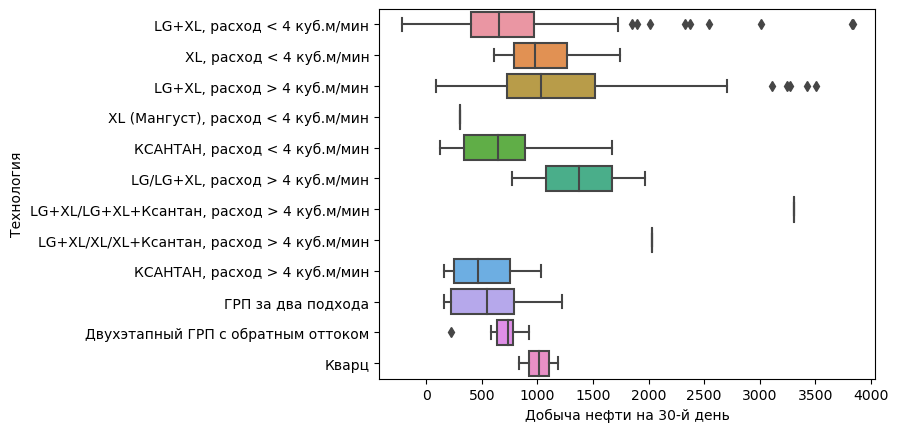

In [107]:
sns.boxplot(data = prod_merged, x = 'Добыча нефти на 30-й день', y = 'Технология')

<Axes: xlabel='Добыча нефти на 60-й день', ylabel='Технология'>

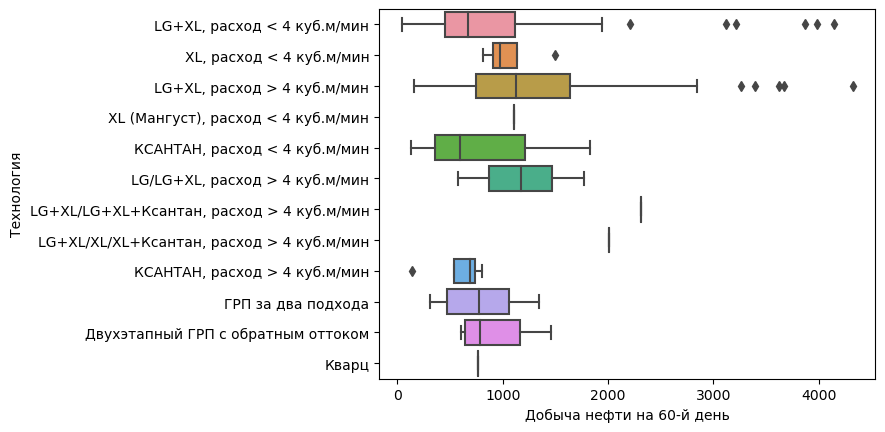

In [108]:
sns.boxplot(data = prod_merged, x = 'Добыча нефти на 60-й день', y = 'Технология')

<Axes: xlabel='Добыча нефти на 120-й день', ylabel='Технология'>

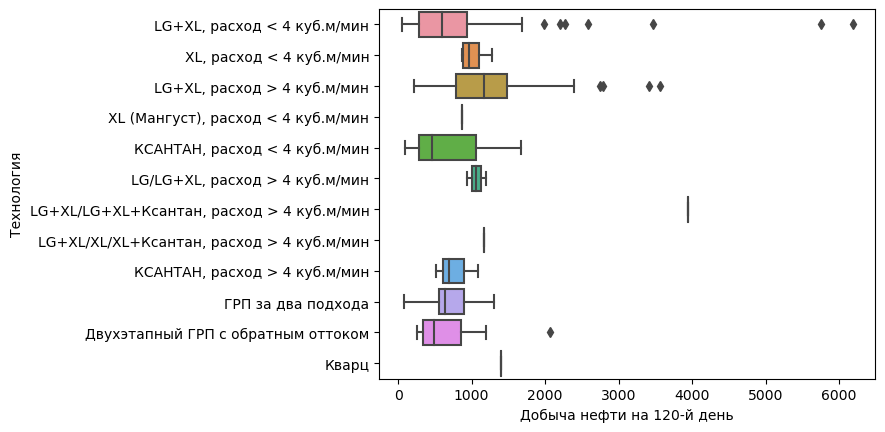

In [109]:
sns.boxplot(data = prod_merged, x = 'Добыча нефти на 120-й день', y = 'Технология')

<Axes: xlabel='Добыча нефти на 30-й день', ylabel='Технология (жидкость ГРП)'>

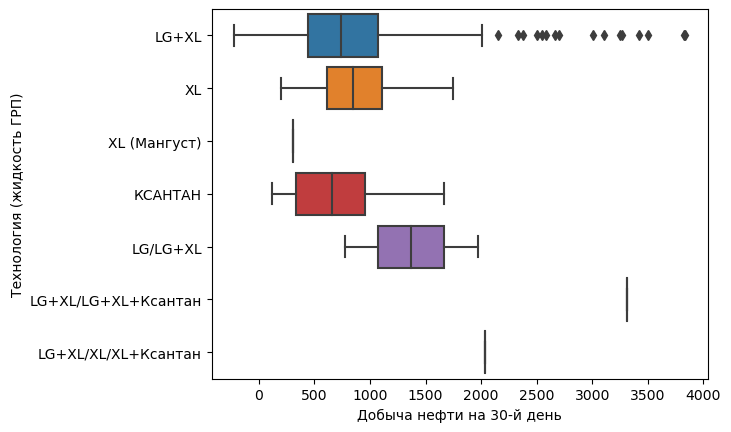

In [110]:
sns.boxplot(data = prod_merged, x = 'Добыча нефти на 30-й день', y = 'Технология (жидкость ГРП)')

In [117]:
prod_merged = prod_merged.query('`Добыча нефти на 30-й день` > 0')

In [127]:
unwanted_technologies = ['XL (Мангуст)', 'LG+XL/XL/XL+Ксантан', 'LG+XL/LG+XL+Ксантан']

In [128]:
prod_merged_filtered = prod_merged[~prod_merged['Технология (жидкость ГРП)'].isin(unwanted_technologies)]

Анализ по технологиям показал что в сравнении мб использованы три варианта технологий: LG+XL, расход < 4 куб.м/мин, LG+XL, расход > 4 куб.м/мин и КСАНТАН, расход < 4 куб.м/мин

# Часть 3. Статистический анализ

In [204]:
#!pip install pingouin

In [187]:
import statsmodels.api as sm
import pingouin as pg
import scipy as sc

In [149]:
prod_merged_clean = prod_merged.dropna()

In [223]:
x = prod_merged_clean[['TVD, м', 'Медианная макс. конц. пропанта, кг/м3', 'Медианый объем буф. стадии, м3', 'ISIP Frac (медиана), атм']]
x = sm.add_constant(x)
y = prod_merged_clean['Добыча нефти на 120-й день']

In [224]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Добыча нефти на 120-й день   R-squared:                       0.149
Model:                                    OLS   Adj. R-squared:                  0.135
Method:                         Least Squares   F-statistic:                     11.19
Date:                        Tue, 18 Mar 2025   Prob (F-statistic):           2.22e-08
Time:                                17:52:29   Log-Likelihood:                -2077.4
No. Observations:                         261   AIC:                             4165.
Df Residuals:                             256   BIC:                             4183.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  1.218e+04   2736.141      4.450      0.000    6788.983    1.76e+04
TVD, м                                   -3.8222      0.925     -4.134      0.000      -5.643      -2.001
Медианная макс. конц. пропанта, кг/м3    -0.0439      0.571     -0.077      0.939      -1.169       1.081
Медианый объем буф. стадии, м3            0.7847      0.404      1.942      0.053      -0.011       1.580
ISIP Frac (медиана), атм                 -3.4384      2.003     -1.716      0.087      -7.383       0.507
==============================================================================
Omnibus:                      215.171   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3966.946
Skew:                           3.190   Prob(JB):                         0.00
Kurtosis:                      21.002   Cond. No.                     1.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Проведем ANOVA для выделенных групп

In [ ]:
prod_merged_clean['log_dob_30'] = np.log(prod_merged_clean['Добыча нефти на 30-й день'])

<Axes: xlabel='log_dob_30', ylabel='Count'>

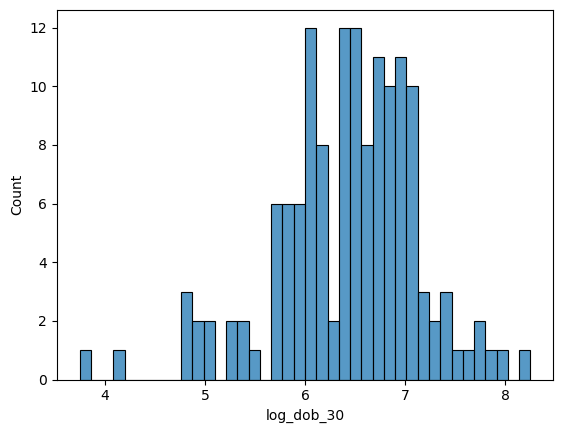

In [179]:
sns.histplot(data = prod_merged_clean.query("Технология == 'LG+XL, расход < 4 куб.м/мин'"), x = 'log_dob_30', bins = 40)

<Axes: xlabel='log_dob_30', ylabel='Count'>

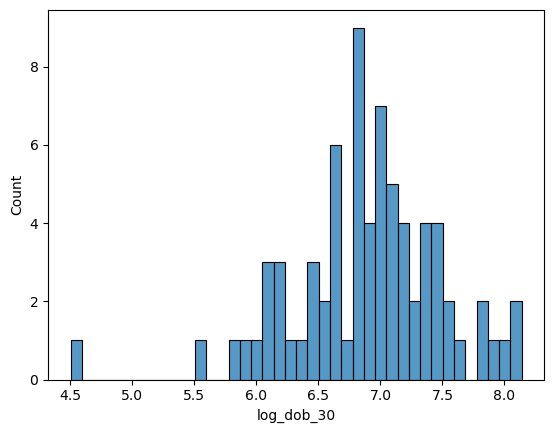

In [180]:
sns.histplot(data = prod_merged_clean.query("Технология == 'LG+XL, расход > 4 куб.м/мин'"), x = 'log_dob_30', bins = 40)

<Axes: xlabel='log_dob_30', ylabel='Count'>

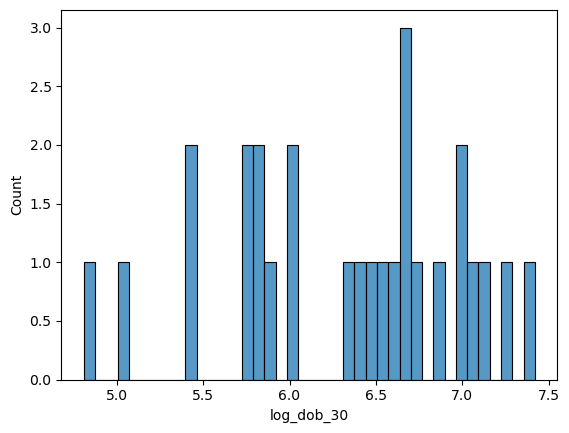

In [181]:
sns.histplot(data = prod_merged_clean.query("Технология == 'КСАНТАН, расход < 4 куб.м/мин'"), x = 'log_dob_30', bins = 40)

In [193]:
prod_merged_clean_tech = prod_merged_clean.query("Технология == 'LG+XL, расход < 4 куб.м/мин' or Технология == 'LG+XL, расход > 4 куб.м/мин' or Технология == 'КСАНТАН, расход < 4 куб.м/мин'")
prod_merged_clean_tech = prod_merged_clean_tech.query('log_dob_30 > 4.8')

In [195]:
pg.normality(data = prod_merged_clean_tech, dv="log_dob_30", 
                   group="Технология", method="normaltest")

,W,pval,normal
Технология,,,
"LG+XL, расход < 4 куб.м/мин",2.612358,0.270853,True
"LG+XL, расход > 4 куб.м/мин",0.009759,0.995133,True
"КСАНТАН, расход < 4 куб.м/мин",1.408021,0.494598,True


In [196]:
pg.ttest(prod_merged_clean_tech.query("Технология == 'LG+XL, расход < 4 куб.м/мин'")['log_dob_30'], prod_merged_clean_tech.query("Технология == 'LG+XL, расход > 4 куб.м/мин'")['log_dob_30'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.454502,167.929638,two-sided,1.732416e-07,"[-0.64, -0.3]",0.744773,8.777e+04,0.999206


In [197]:
pg.homoscedasticity(prod_merged_clean, dv = 'log_dob_30', group = 'Технология', method = 'levene')

,W,pval,equal_var
levene,0.953419,0.465969,True


In [198]:
pg.anova(data = prod_merged_clean_tech, dv = 'log_dob_30', between = 'Технология')

,Source,ddof1,ddof2,F,p-unc,np2
0,Технология,2,237,15.600187,4.317602e-07,0.116332


In [200]:
pg.pairwise_tukey(data = prod_merged_clean_tech, dv = 'log_dob_30', between = 'Технология')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,"LG+XL, расход < 4 куб.м/мин","LG+XL, расход > 4 куб.м/мин",6.457746,6.924222,-0.466476,0.091718,-5.085979,0.000002,-0.742122
1,"LG+XL, расход < 4 куб.м/мин","КСАНТАН, расход < 4 куб.м/мин",6.457746,6.316705,0.141041,0.133016,1.060328,0.539673,0.211008
2,"LG+XL, расход > 4 куб.м/мин","КСАНТАН, расход < 4 куб.м/мин",6.924222,6.316705,0.607517,0.142893,4.251557,0.000090,1.021531


<Axes: xlabel='log_dob_30', ylabel='Технология'>

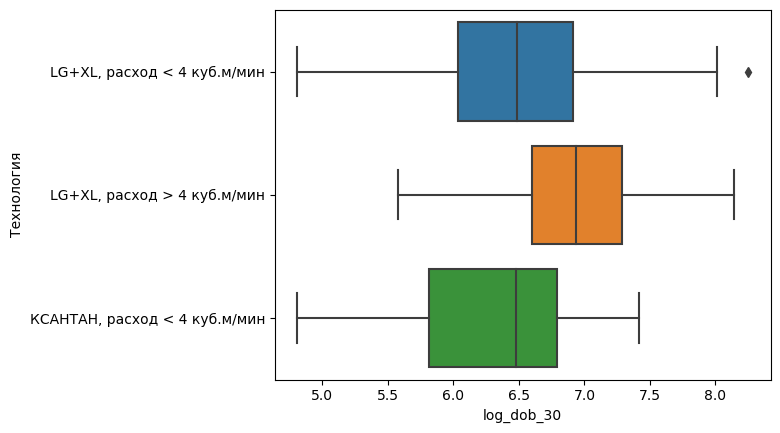

In [203]:
sns.boxplot(data = prod_merged_clean_tech, x = 'log_dob_30', y = 'Технология')